In [28]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv(r"C:\Users\ASUS\Documents\BTL_AI\AI_BTL\sensor_data.csv", low_memory=False)


In [13]:
data.head()


,soil_moisture,air_humidity,temperature,light,output
0,42.472407,74.908086,19.628323,567.173607,2
1,77.042858,66.804818,28.547524,531.263690,2
2,63.919637,55.476381,36.823646,123.077859,2
3,55.919509,80.689751,33.305622,407.123045,1
4,29.361118,74.236559,35.164029,442.176057,1


In [14]:
data.isna().sum()
## Sử dụng phương thức isna() để xác định các giá trị NaN và sum() để tính tổng số giá trị bị thiếu trong mỗi cột


soil_moisture    0
air_humidity     0
temperature      0
light            0
output           0
dtype: int64

In [15]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   soil_moisture  500 non-null    float64
 1   air_humidity   500 non-null    float64
 2   temperature    500 non-null    float64
 3   light          500 non-null    float64
 4   output         500 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 19.7 KB


In [16]:
data.nunique()


soil_moisture    500
air_humidity     500
temperature      500
light            500
output             3
dtype: int64

In [17]:
data.describe().T
# count: Số lượng giá trị không bị thiếu.
# mean: Giá trị trung bình.
# std: Độ lệch chuẩn, thể hiện độ biến thiên của dữ liệu.
# min: Giá trị nhỏ nhất.
# 25%: Percentile thứ 25 (giá trị dưới đó có 25% dữ liệu).
# 50%: Median (giá trị giữa).
# 75%: Percentile thứ 75 (giá trị dưới đó có 75% dữ liệu).
# max: Giá trị lớn nhất.

,count,mean,std,min,25%,50%,75%,max
soil_moisture,500.0,49.913703,17.921305,20.303695,34.476781,50.789825,65.367493,79.577888
air_humidity,500.0,64.097570,14.274673,40.231601,51.454962,63.591078,76.316841,89.985884
temperature,500.0,27.938953,7.429823,15.123500,21.030701,28.493458,34.433594,39.985343
light,500.0,546.828840,258.308870,102.896437,316.966844,558.002204,763.638625,998.512760
output,500.0,0.976000,0.827523,0.000000,0.000000,1.000000,2.000000,2.000000


[Text(0.5, 0, 'Output'),
 Text(0, 0.5, 'Soil Moisture'),
 Text(0.5, 1.0, 'Output Distribution by Soil Moisture')]

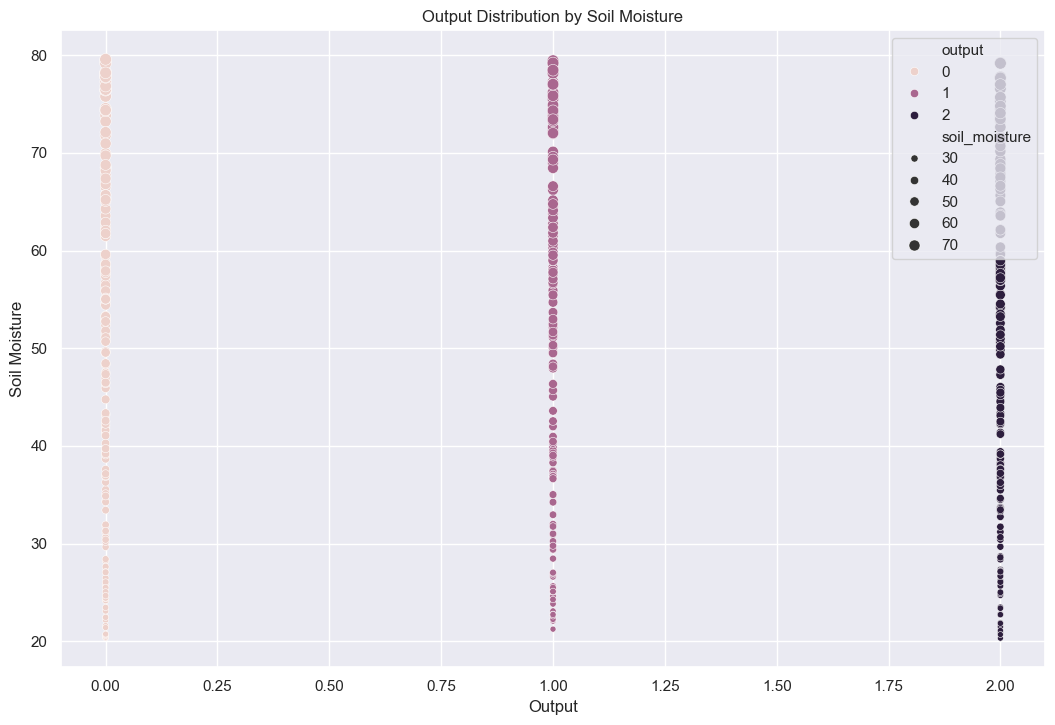

In [23]:
# Assume the DataFrame 'data' has columns 'output' and 'soil_moisture'  
sns.set(rc={'figure.figsize':(12.7,8.27)})  

ax = sns.scatterplot(data=data, x="output", y="soil_moisture", hue="output", size="soil_moisture", legend='brief')  
ax.set(xlabel="Output", ylabel="Soil Moisture", title="Output Distribution by Soil Moisture")

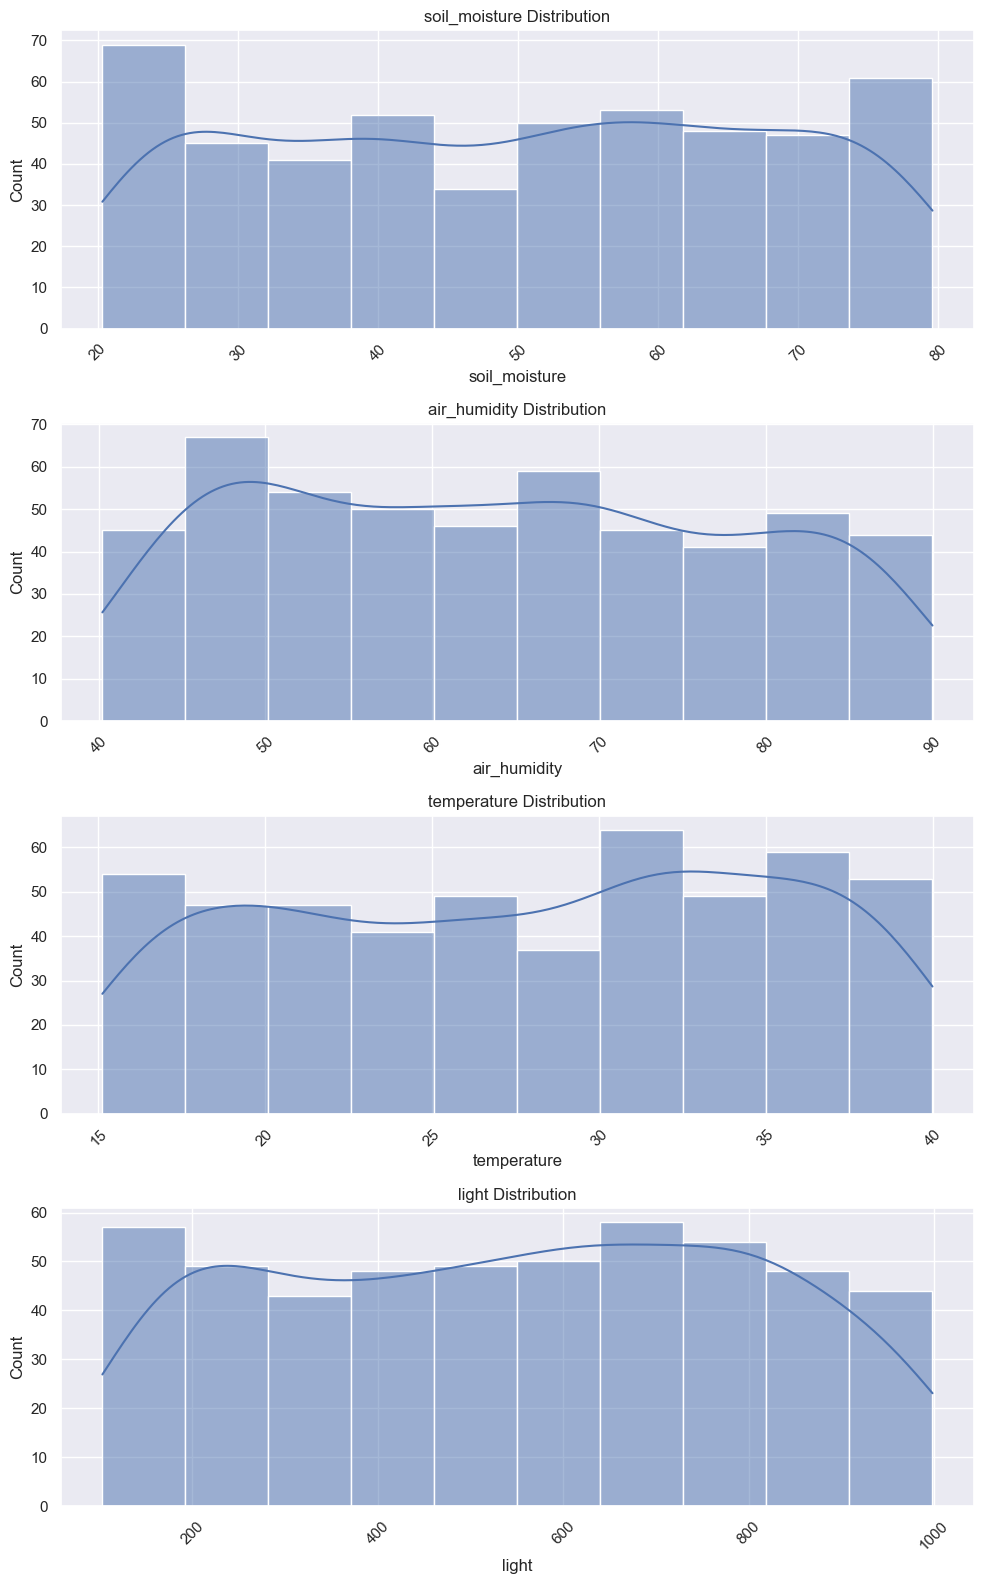

In [29]:


numerical_columns = [col for col in data.select_dtypes(include=['number']).columns if col != 'output']  

fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(10, len(numerical_columns)*4))  

axes = axes.flatten()  

for i, col in enumerate(numerical_columns):  
    sns.histplot(data[col], kde=True, ax=axes[i])  
    axes[i].set_title(f'{col} Distribution')  
    axes[i].tick_params(axis='x', rotation=45)  

plt.tight_layout()  
plt.show()